In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

superstor_df = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')
superstor_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [30]:
superstor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [2]:
stor_by_product = superstor_df.groupby('Product Name')['Sales'].sum()

In [3]:
stor_sales = stor_by_product.sort_values(ascending=False)

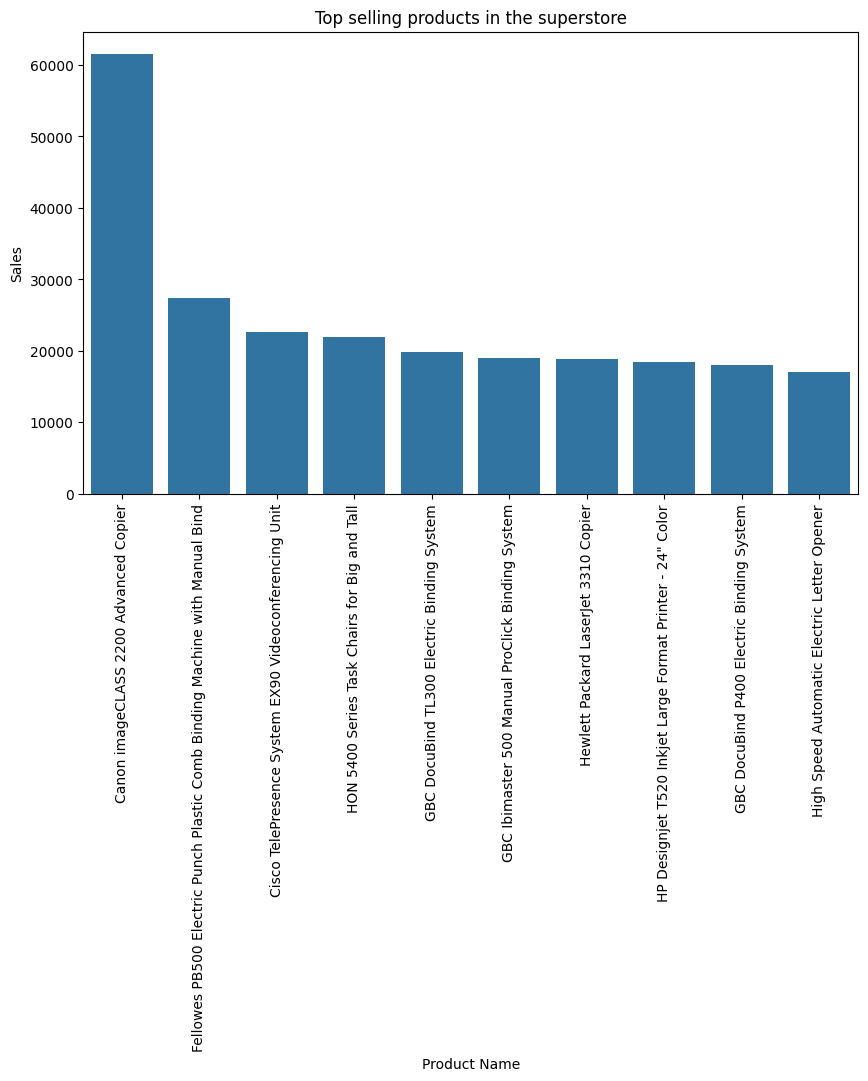

In [4]:
plt.figure(figsize=(10,6))
plt.title('Top selling products in the superstore')
sns.barplot(data=stor_sales.head(10))
plt.xticks(rotation = 90)
plt.show()

In [5]:
stor_by_product = superstor_df.groupby('Product Name')['Profit'].sum()

In [6]:
stor_profit = stor_by_product.sort_values(ascending=False)

In [7]:
stor_profit.head().index == stor_sales.head().index

array([ True,  True, False, False, False])

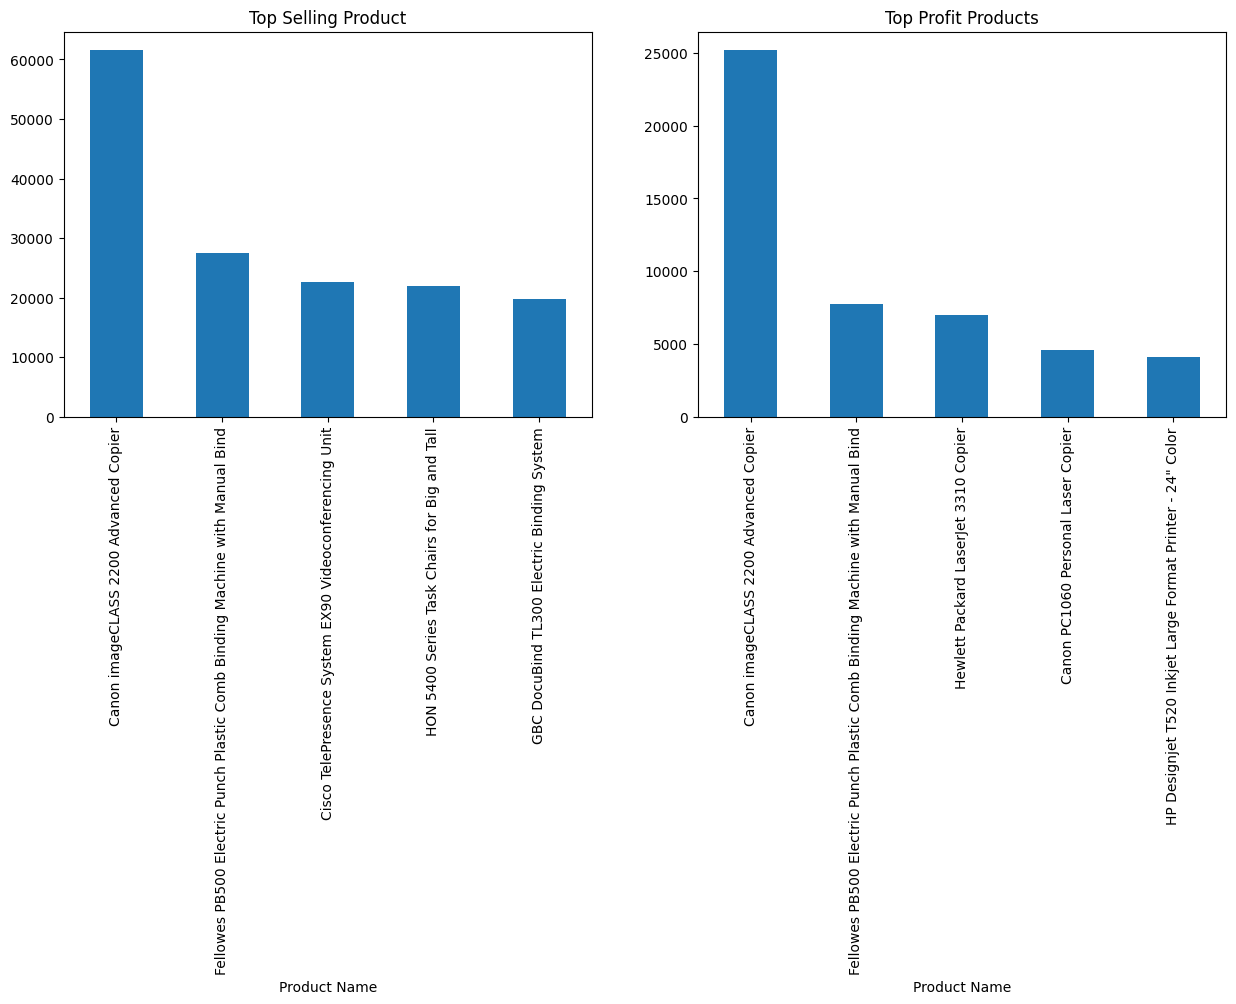

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.set_title("Top Selling Product")
plt.xticks(rotation=90)

stor_sales.head().plot(kind='bar', y="Sales", ax=ax1)

stor_profit.head().plot(kind='bar',y="Profit", ax=ax2)

ax2.set_title('Top Profit Products')

plt.show()

In [12]:
stor_sales.head()

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

In [10]:
superstor_df['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [20]:
product = superstor_df[superstor_df['Product Name'] == 'Canon imageCLASS 2200 Advanced Copier']

region = product.groupby('Region')[['Sales', 'Profit']].mean()

In [21]:
product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2623,2624,CA-2017-127180,10/22/2017,10/24/2017,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,...,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
4190,4191,CA-2017-166709,11/17/2017,11/22/2017,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,...,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
6425,6426,CA-2016-143714,5/23/2016,5/27/2016,Standard Class,CC-12370,Christopher Conant,Consumer,United States,Philadelphia,...,19120,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,8399.976,4,0.4,1119.9968
6826,6827,CA-2016-118689,10/2/2016,10/9/2016,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760
8153,8154,CA-2017-140151,3/23/2017,3/25/2017,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,...,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808


<Axes: xlabel='Region'>

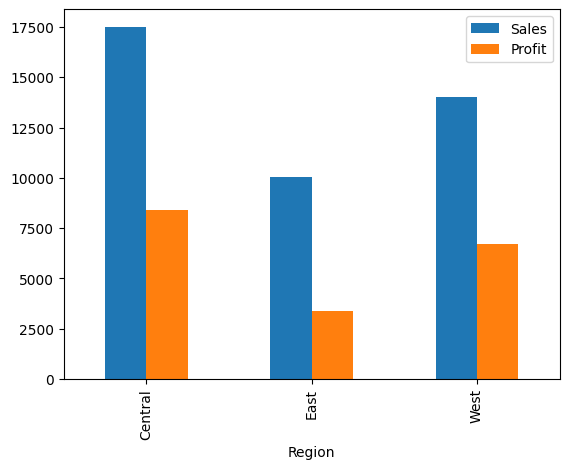

In [19]:
region.plot(kind='bar')

<Axes: xlabel='Region'>

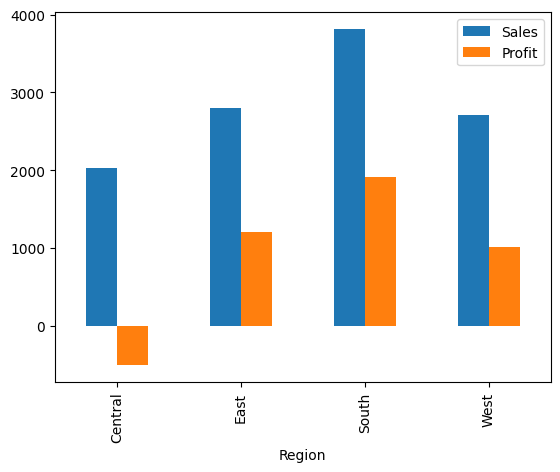

In [24]:
product = superstor_df[superstor_df['Product Name'] == 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind']

region = product.groupby('Region')[['Sales', 'Profit']].mean()

region.plot(kind='bar')

In [27]:
product = superstor_df[(superstor_df['Product Name'] == 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind') & (superstor_df['Region'] == 'Central')] 

In [28]:
product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,2847,CA-2017-152093,9/10/2017,9/15/2017,Standard Class,SN-20560,Skye Norling,Home Office,United States,Chicago,...,60653,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,5311,CA-2017-131254,11/19/2017,11/21/2017,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,...,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,7684,CA-2015-120782,4/28/2015,5/1/2015,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,...,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


<Axes: >

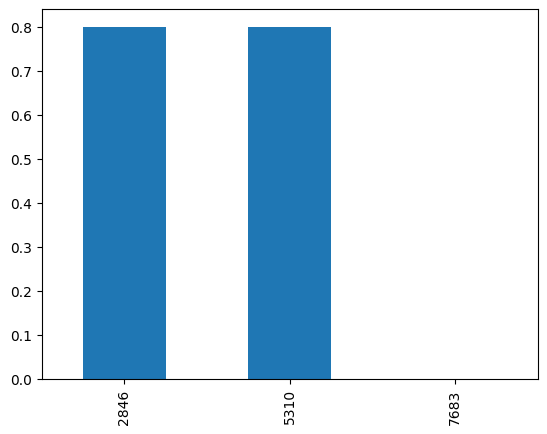

In [29]:
product['Discount'].plot(kind='bar')

In [31]:
superstor_df['Order Date'] = pd.to_datetime(superstor_df['Order Date'])

In [43]:
monthly_sales = superstor_df.groupby('Order Date').sum()


monthly_sales

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,1/7/2014,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.4480,2,0.20,5.5512
2014-01-04,2223,CA-2014-112326CA-2014-112326CA-2014-112326,1/8/20141/8/20141/8/2014,Standard ClassStandard ClassStandard Class,PO-19195PO-19195PO-19195,Phillina OberPhillina OberPhillina Ober,Home OfficeHome OfficeHome Office,United StatesUnited StatesUnited States,NapervilleNapervilleNaperville,IllinoisIllinoisIllinois,181620,CentralCentralCentral,OFF-LA-10003223OFF-ST-10002743OFF-BI-10004094,Office SuppliesOffice SuppliesOffice Supplies,LabelsStorageBinders,Avery 508SAFCO Boltless Steel ShelvingGBC Stan...,288.0600,8,1.20,-65.9901
2014-01-05,1760,CA-2014-141817,1/12/2014,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.5360,3,0.20,4.8840
2014-01-06,64855,CA-2014-130813CA-2014-106054CA-2014-167199CA-2...,1/8/20141/7/20141/10/20141/10/20141/10/20141/1...,Second ClassFirst ClassStandard ClassStandard ...,LS-17230JO-15145ME-17320ME-17320ME-17320ME-173...,Lycoris SaundersJack O'BriantMaria EtezadiMari...,ConsumerCorporateHome OfficeHome OfficeHome Of...,United StatesUnited StatesUnited StatesUnited ...,Los AngelesAthensHendersonHendersonHendersonHe...,CaliforniaGeorgiaKentuckyKentuckyKentuckyKentu...,417594,WestSouthSouthSouthSouthSouthSouthSouthSouth,OFF-PA-10002005OFF-AR-10002399FUR-CH-10004063O...,Office SuppliesOffice SuppliesFurnitureOffice ...,PaperArtChairsBindersArtPhonesPhonesFastenersP...,"Xerox 225Dixon Prang Watercolor Pencils, 10-Co...",4407.1000,30,0.00,1358.0524
2014-01-07,15323,CA-2014-105417CA-2014-105417,1/12/20141/12/2014,Standard ClassStandard Class,VS-21820VS-21820,Vivek SundaresamVivek Sundaresam,ConsumerConsumer,United StatesUnited States,HuntsvilleHuntsville,TexasTexas,154680,CentralCentral,FUR-FU-10004864OFF-BI-10003708,FurnitureOffice Supplies,FurnishingsBinders,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",87.1580,10,1.40,-71.9621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-26,18429,US-2017-106705CA-2017-112487CA-2017-121741CA-2...,1/1/201812/30/201712/26/20171/1/2018,Standard ClassStandard ClassSame DayStandard C...,PO-18850TC-21535YC-21895KB-16240,Patrick O'BrillTracy CollinsYoseph CarrollKare...,ConsumerHome OfficeCorporateCorporate,United StatesUnited StatesUnited StatesUnited ...,BurlingtonColumbusFremontOdessa,IowaOhioNebraskaTexas,243617,CentralEastCentralCentral,OFF-PA-10001509OFF-BI-10000494OFF-ST-10004459O...,Office SuppliesOffice SuppliesOffice SuppliesO...,PaperBindersStoragePaper,"Recycled Desk Saver Line ""While You Were Out"" ...",814.5940,12,0.90,61.1202
2017-12-27,5141,CA-2017-134404CA-2017-134404,12/27/201712/27/2017,Same DaySame Day,DR-12880DR-12880,Dan ReichenbachDan Reichenbach,CorporateCorporate,United StatesUnited States,NewarkNewark,OhioOhio,86110,EastEast,TEC-PH-10000576OFF-AR-10004441,TechnologyOffice Supplies,PhonesArt,AT&T 1080 Corded phoneBIC Brite Liner Highligh...,177.6360,6,0.60,-31.9742
2017-12-28,81880,CA-2017-163979CA-2017-164826CA-2017-164826CA-2...,1/2/20181/4/20181/4/20181/4/20181/4/20181/1/20...,Second ClassStandard ClassStandard ClassStanda...,KH-16690JF-15415JF-15415JF-15415JF-15415GH-146...,Kristen HastingsJennifer FergusonJennifer Ferg...,CorporateConsumerConsumerConsumerConsumerConsu...,United StatesUnited StatesUnited StatesUnited ...,San FranciscoNew York CityNew York CityNew Yor...,CaliforniaNew YorkNew YorkNew YorkNew YorkTexa...,1135023,WestEastEastEastEastCentralCentralWestSouthWes...,OFF-ST-10003208OFF-LA-10001297OF

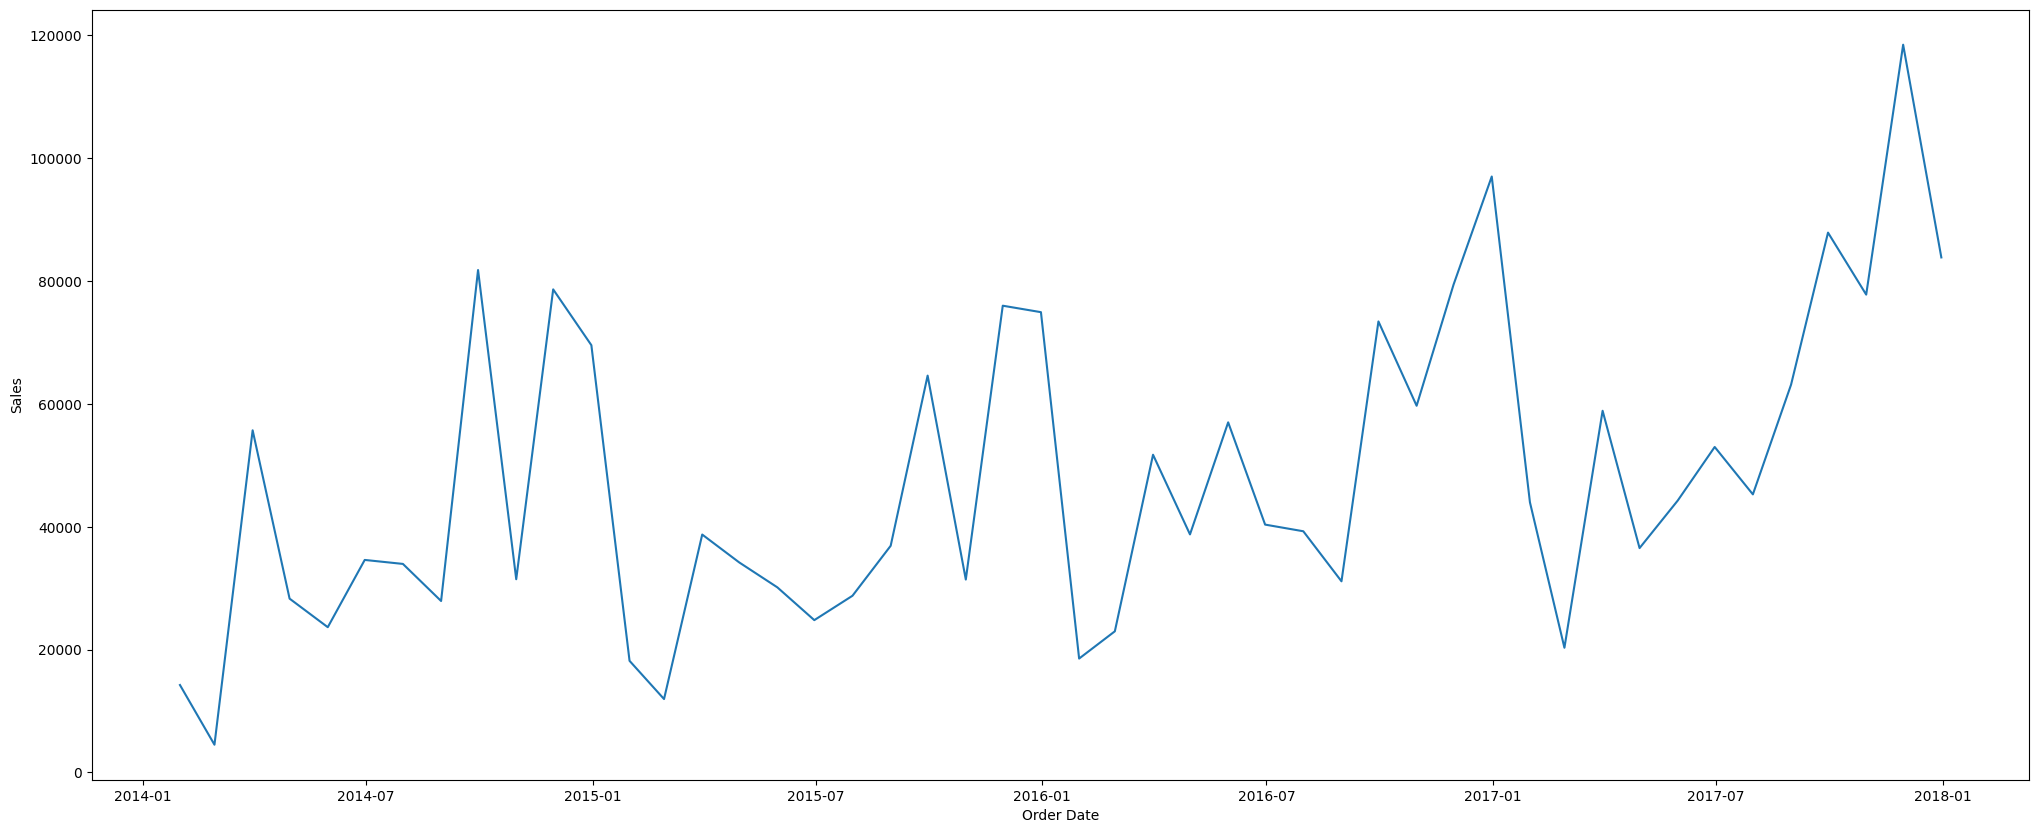

In [49]:
monthly_sales = monthly_sales.resample('M').sum()
plt.figure(figsize=(25,10))
sns.lineplot(data=monthly_sales['Sales'])
plt.show()

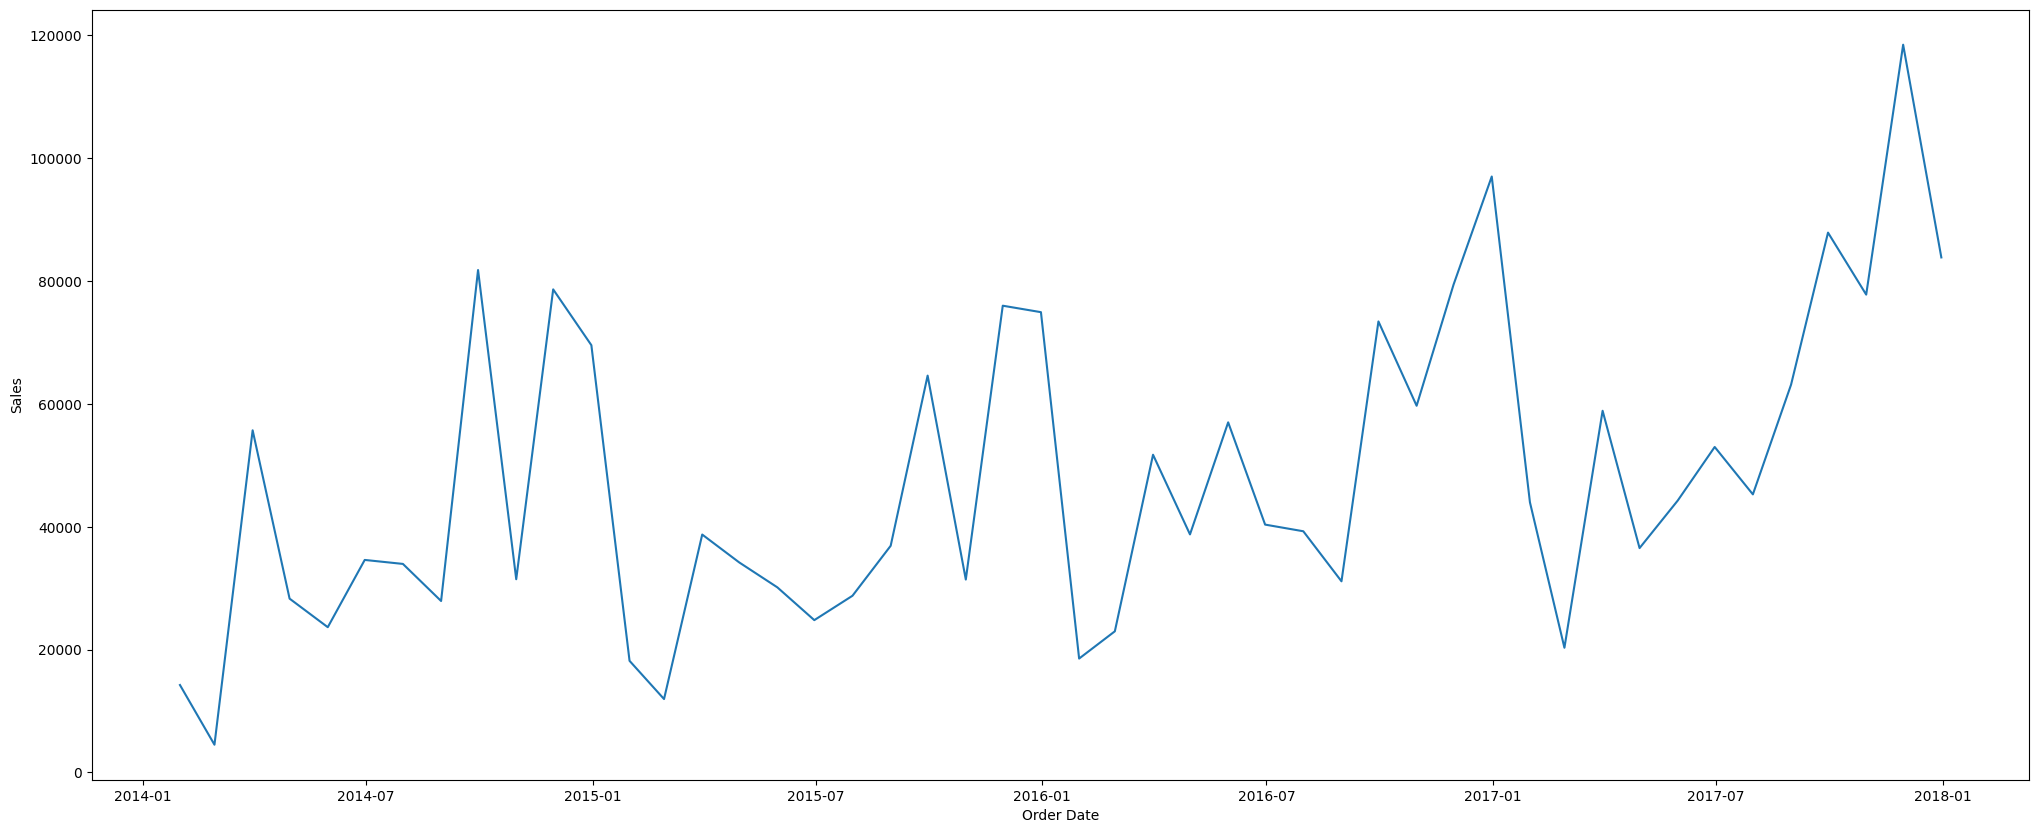

In [52]:
plt.figure(figsize=(25,10))
sns.lineplot(data=monthly_sales['Sales'])
plt.title("Number of Orders by Month")
plt.show()

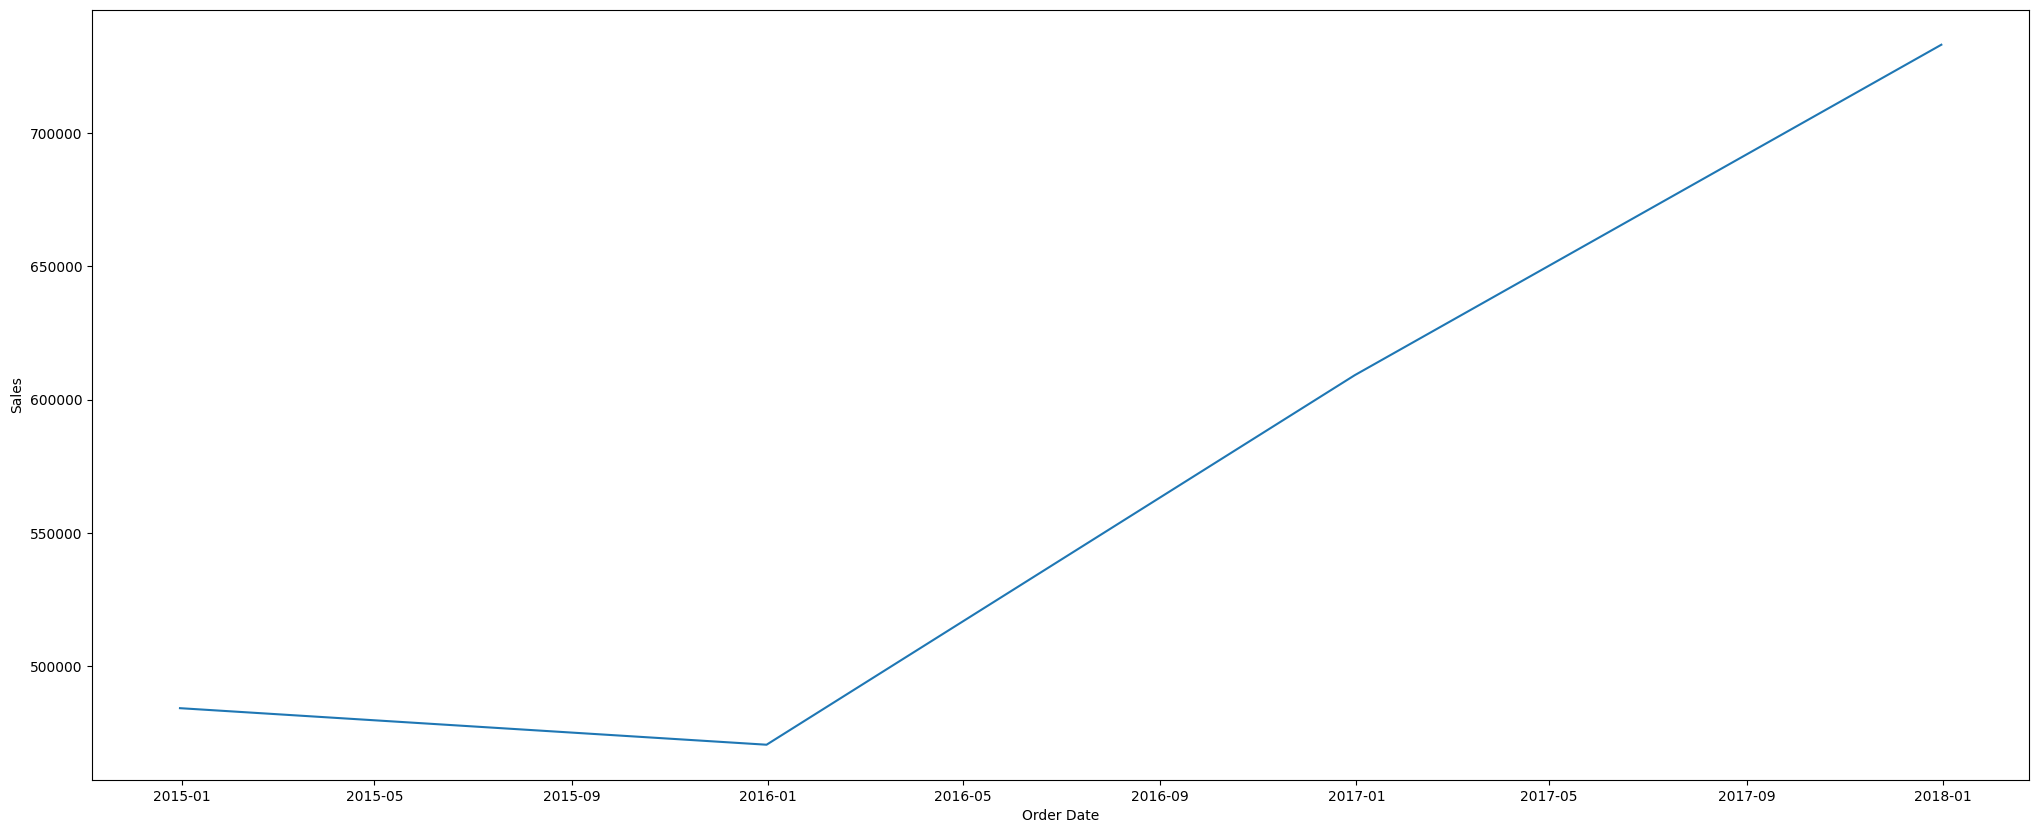

In [58]:
yearly = superstor_df.groupby('Order Date').sum()
yearly = yearly.resample('Y').sum()
plt.figure(figsize=(25,10))
sns.lineplot(data=yearly['Sales'])
plt.title("Number of Orders by Year")
plt.show()

In [60]:
df_places = superstor_df[['City','State','Region','Sales','Profit']]

df_places

,City,State,Region,Sales,Profit
0,Henderson,Kentucky,South,261.9600,41.9136
1,Henderson,Kentucky,South,731.9400,219.5820
2,Los Angeles,California,West,14.6200,6.8714
3,Fort Lauderdale,Florida,South,957.5775,-383.0310
4,Fort Lauderdale,Florida,South,22.3680,2.5164
...,...,...,...,...,...
9989,Miami,Florida,South,25.2480,4.1028
9990,Costa Mesa,California,West,91.9600,15.6332
9991,Costa Mesa,California,West,258.5760,19.3932
9992,Costa Mesa,California,West,29.6000,13.3200


<Axes: xlabel='Region'>

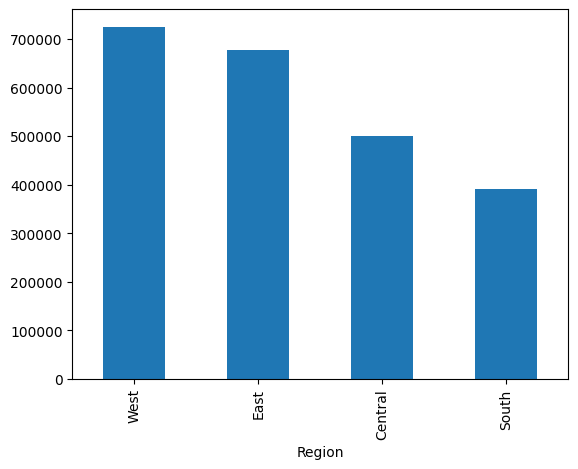

In [66]:
grouped = df_places.groupby('Region').sum()

grouped.sort_values(by='Sales', ascending=False, inplace=True)

grouped['Sales'].plot(kind='bar')

<Axes: xlabel='Region'>

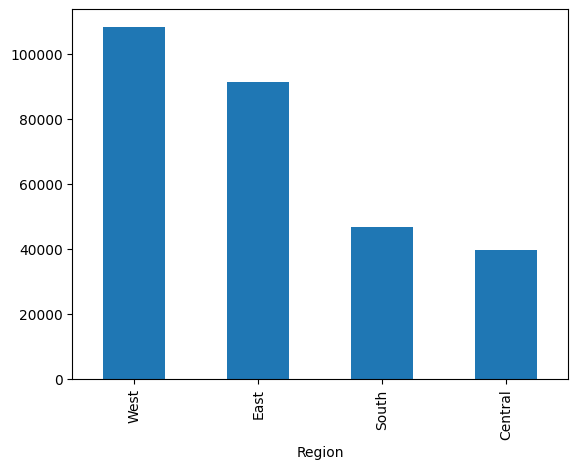

In [67]:
grouped.sort_values(by='Profit', ascending=False, inplace=True)

grouped['Profit'].plot(kind='bar')

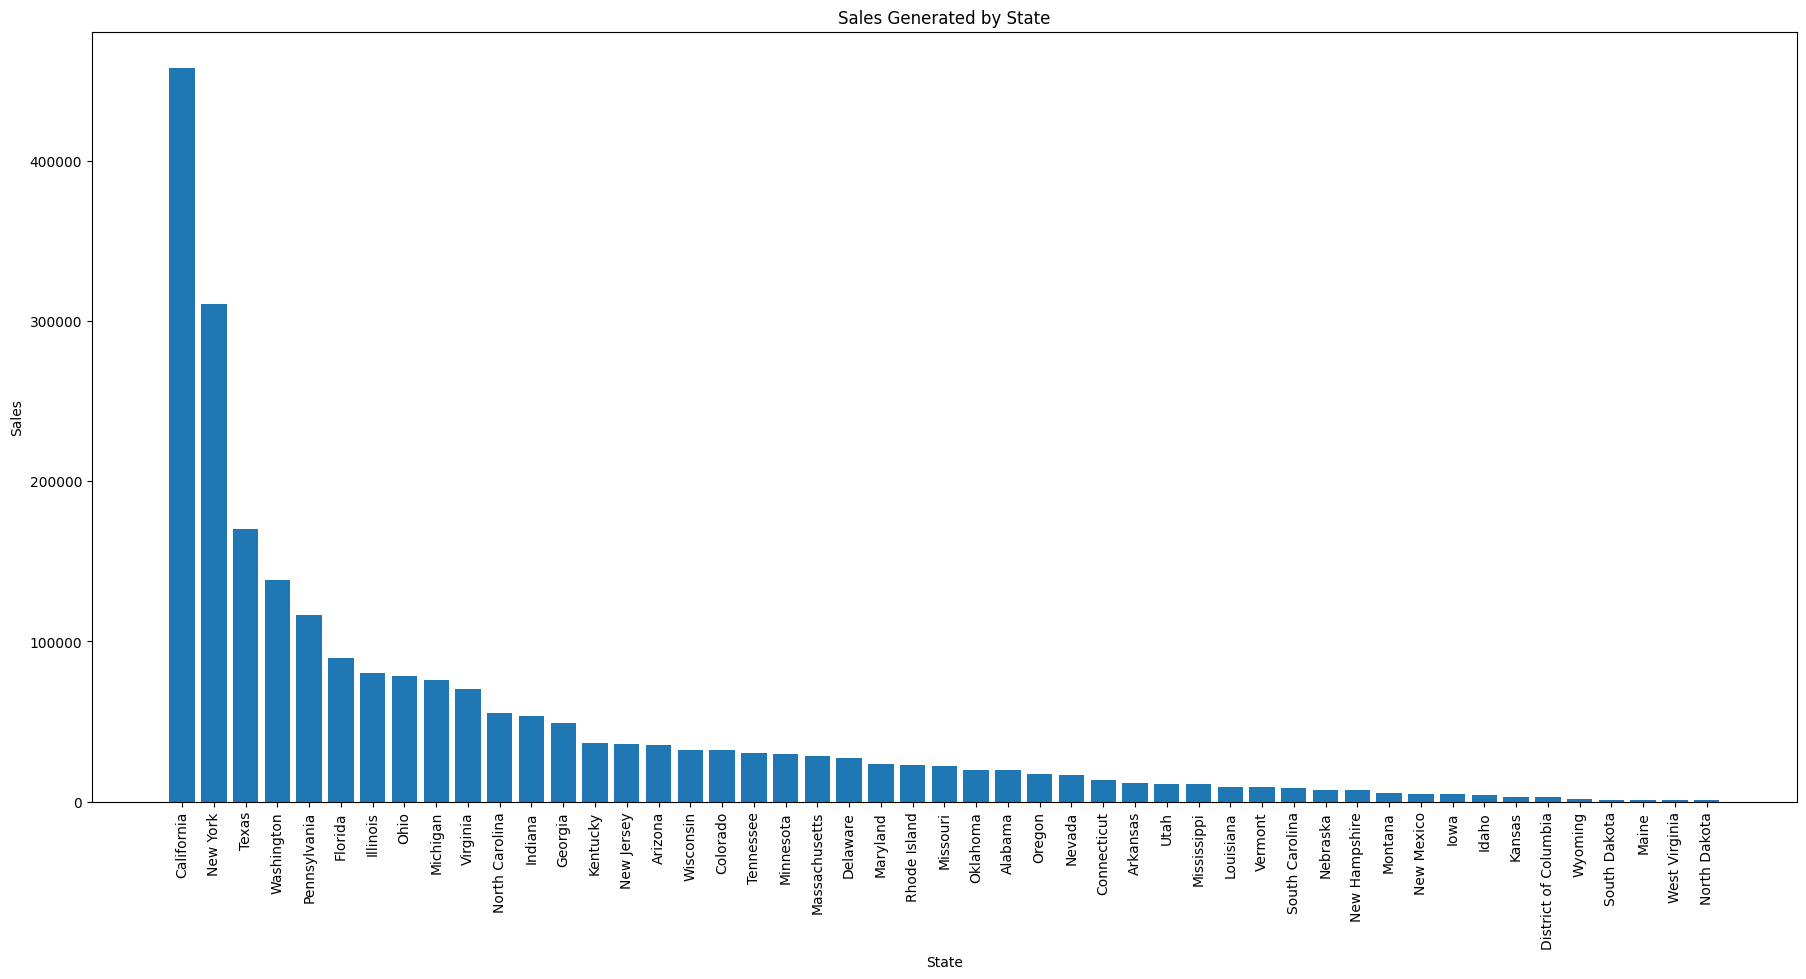

In [71]:
grouped = df_places.groupby('State').sum().reset_index()
grouped.sort_values(by='Sales', ascending=False, inplace=True)


plt.figure(figsize=(22,10))
plt.bar(grouped['State'], grouped['Sales'], align='center',)
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)

plt.show()

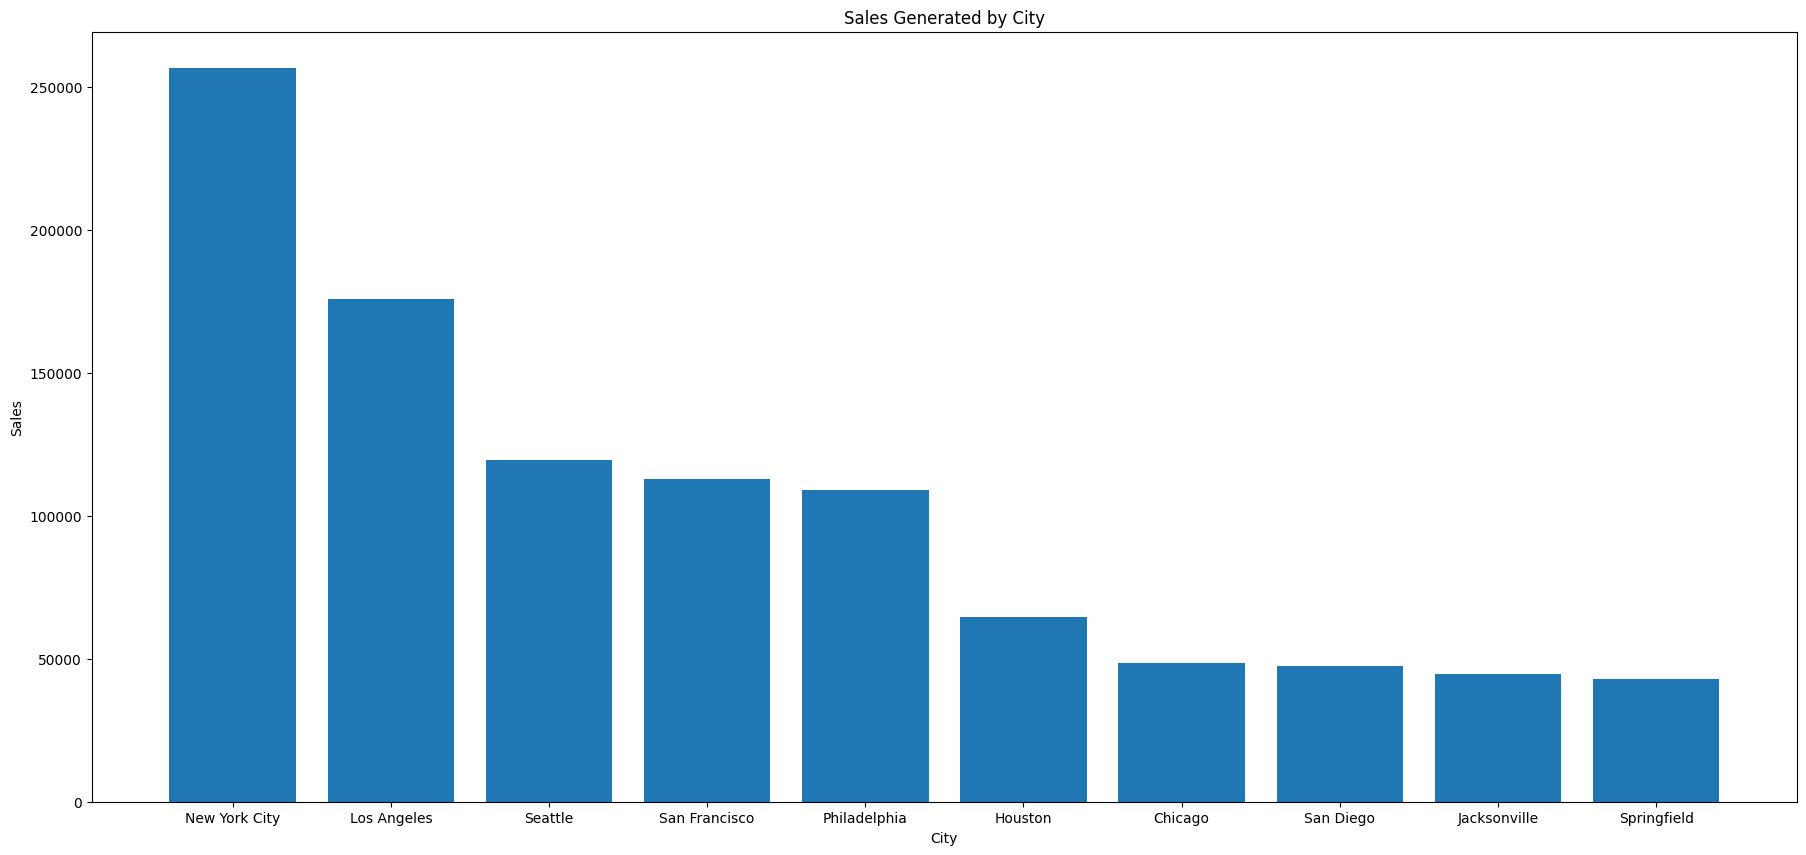

In [74]:
grouped = df_places.groupby('City').sum().reset_index()
grouped.sort_values(by='Sales', ascending=False, inplace=True)

top_10 = grouped.head(10)

plt.figure(figsize=(22,10))
plt.bar(top_10['City'], top_10['Sales'], align='center',)
plt.xlabel("City")
plt.ylabel("Sales")
plt.title("Sales Generated by City")


plt.show()

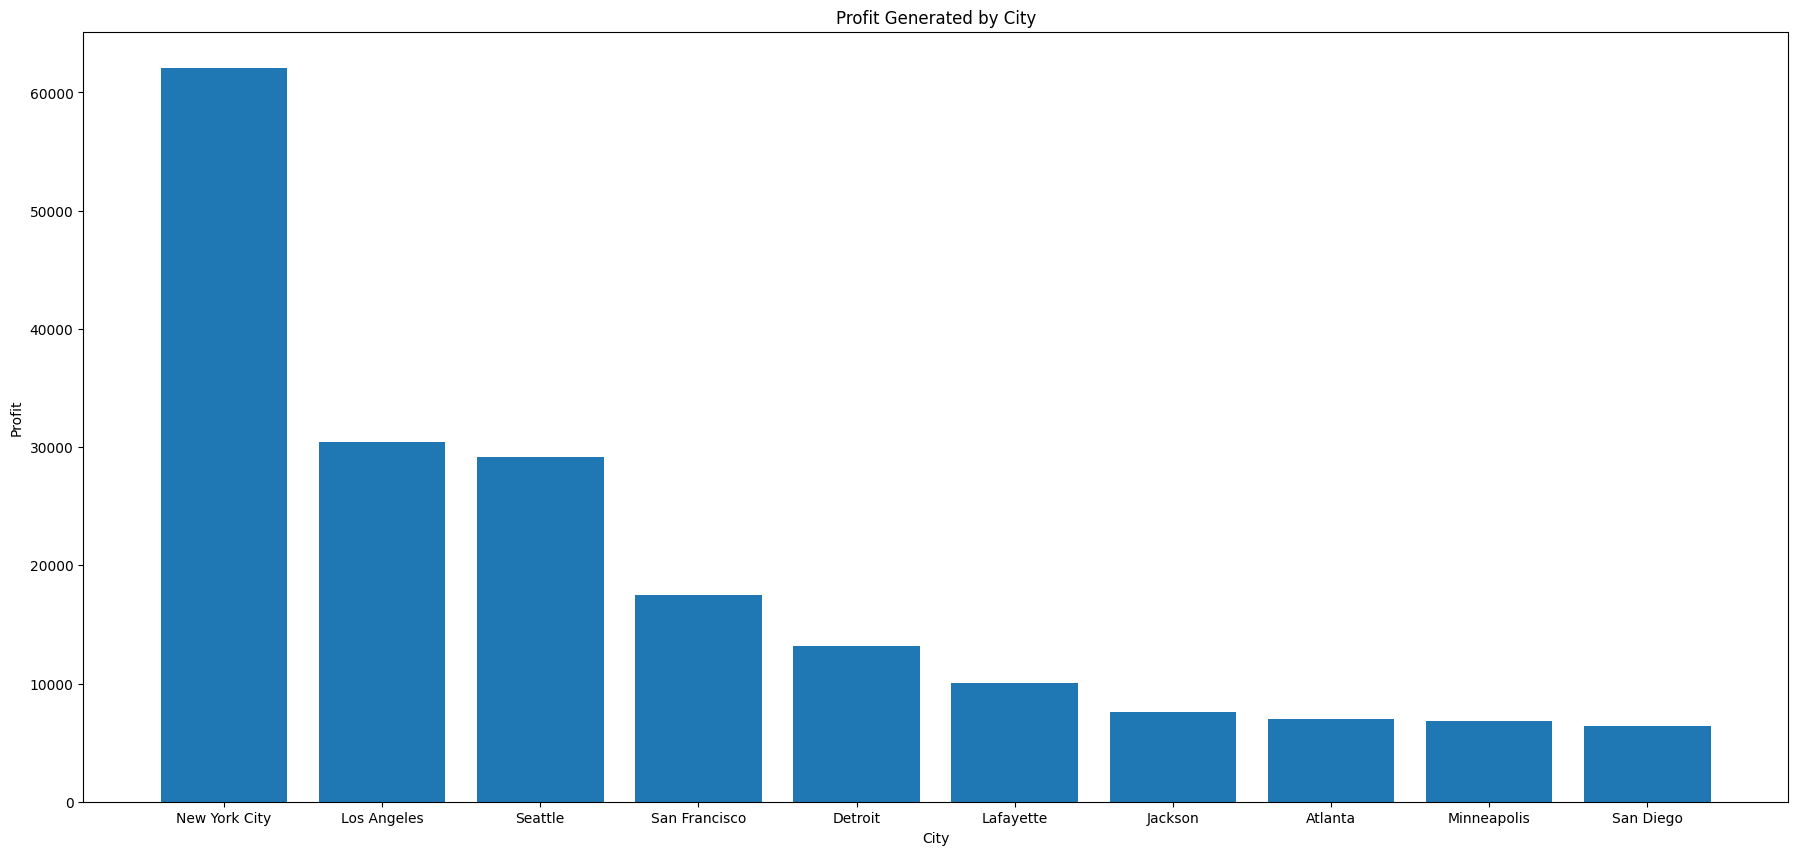

In [75]:
grouped.sort_values(by='Profit', ascending=False, inplace=True)

top_10 = grouped.head(10)

plt.figure(figsize=(22,10))
plt.bar(top_10['City'], top_10['Profit'], align='center',)
plt.xlabel("City")
plt.ylabel("Profit")
plt.title("Profit Generated by City")


plt.show()

In [80]:
superstor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [85]:
discount = superstor_df.groupby("Discount")[['Sales', 'Profit']].sum().reset_index()

discount

,Discount,Sales,Profit
0,0.00,1.087908e+06,320987.6032
1,0.10,5.436935e+04,9029.1770
2,0.15,2.755852e+04,1418.9915
3,0.20,7.645944e+05,90337.3060
4,0.30,1.032267e+05,-10369.2774
5,0.32,1.449346e+04,-2391.1377
6,0.40,1.164178e+05,-23057.0504
7,0.45,5.484974e+03,-2493.1111
8,0.50,5.891854e+04,-20506.4281
9,0.60,6.644700e+03,-5944.6552


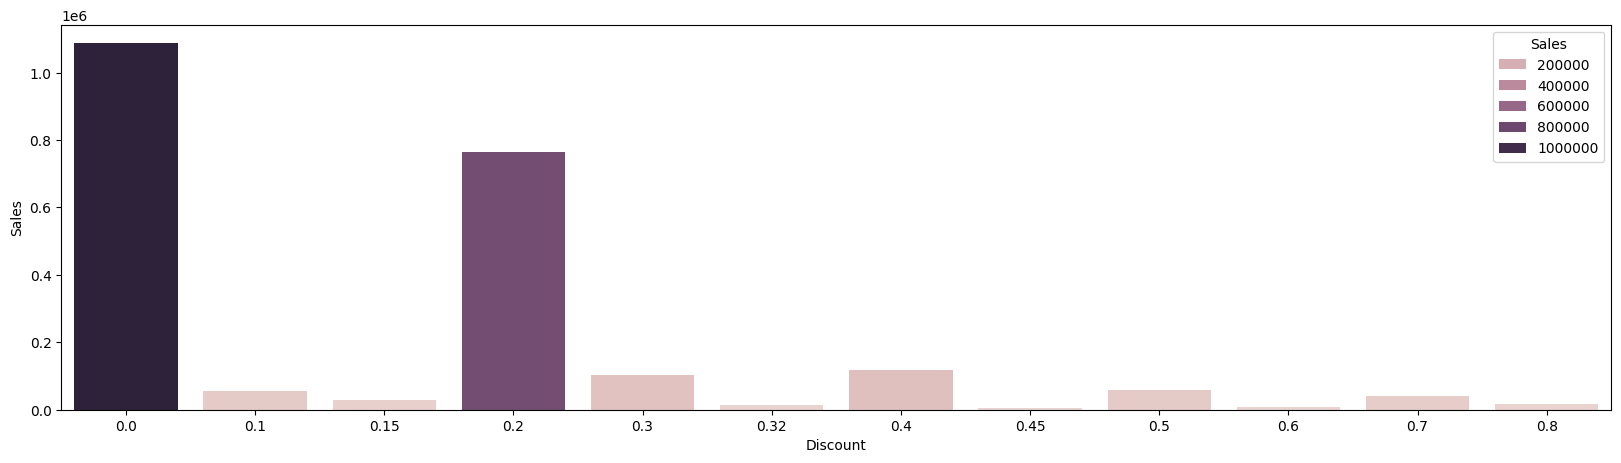

In [86]:
plt.figure(figsize=(20,5))
sns.barplot(data=discount, x=discount['Discount'], y=discount['Sales'], hue=discount['Sales'])
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()

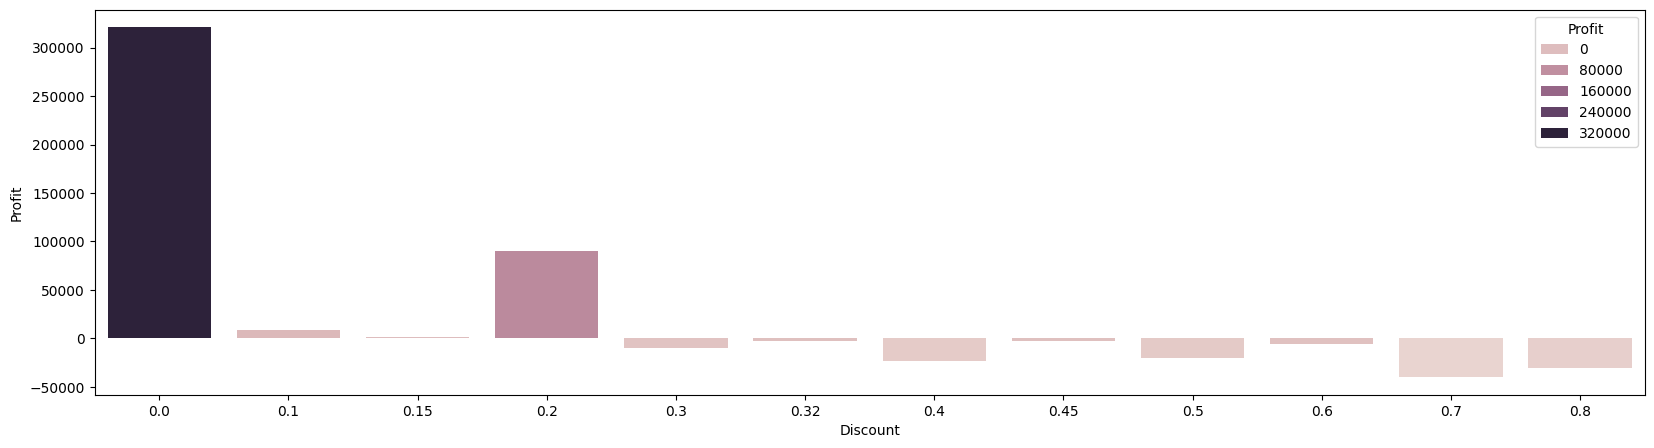

In [87]:
plt.figure(figsize=(20,5))
sns.barplot(data=discount, x=discount['Discount'], y=discount['Profit'], hue=discount['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()